# <font color="red"> TripAdvisor Restaurant Recommendation 

**Features:** 
* Name of the Restaurant
* Street Address
* Location
* Type of Cuisine Served
* Contact Number
* TripAdvisor Restuarant URL
* Menu URL

**Targets:** 
* Star ratings
* Total number of people who rated
* Customer reviews (Comments)

## <font color="purple"> Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("TripAdvisor_RestauarantRecommendation.csv")

In [3]:
df.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$


In [4]:
len(df)

3062

In [5]:
df.shape

(3062, 11)

In [6]:
df.Name.nunique()

2641

In [7]:
df.isnull().sum()

Name                  0
Street Address        0
Location              0
Type                 13
Reviews               0
No of Reviews         0
Comments            615
Contact Number        0
Trip_advisor Url      0
Menu                  0
Price_Range           0
dtype: int64

### <font color="blue"> Data Cleaning

In [8]:
df.Menu.unique()

array(['Check The Website for a Menu',
       'http://tabletalkdiner.com/menu/breakfast/',
       'https://sixtyvines.com/menu/plano-tx/',
       'http://www.malbeccuisine.com/pasadena/lunch-menu',
       'https://resortsac.com/wp-content/uploads/2018/08/Breadsticks_BreakfastMenu_Winter-2017-2018.pdf',
       'https://revolvefoodwine.com/menus/',
       'http://www.tabernillalaredo.com#menu',
       'http://jorgesmexican.com/index.php?page=menu',
       'http://www.zizikis.com/menus',
       'http://www.theatticonbroadway.com/pages/menu',
       'https://order.thecheesecakefactory.com/menu/fresno-ca',
       'http://pizzeriacredo.com/#our-menu', 'http://www.lubys.com/menu',
       'http://www.normascafe.com/menu/',
       'https://mashd.com/wp-content/uploads/2019/08/Davie_Brunch-Menu_08_08_19.pdf',
       'http://www.buzzardbillys.com/des-moines/menu/',
       'http://www.bisquelbi.com',
       'https://www.maxiesithaca.com/menus/#food',
       'https://order.thecheesecakefactory.com/

In [9]:
df["Price_Range"].unique()

array(['$$ - $$$', '$$$$', '$', 'American', 'Not Specified', 'Italian'],
      dtype=object)

In [10]:
df=df.drop(["Menu","Trip_advisor Url","Price_Range","Contact Number"],axis=1)

In [11]:
df["Comments"][7]

"My husband and I went to Greece last fall and fell in love with the beauty and the food so while on a  Dallas business trip, we came across Ziziki's and thought we'd give it a go knowing that this was risky after 2 weeks...More"

In [12]:
df.Reviews.unique()

array(['4.5 of 5 bubbles', '4 of 5 bubbles', '5 of 5 bubbles',
       '3.5 of 5 bubbles', '3 of 5 bubbles', 'No review'], dtype=object)

In [13]:
display(df[df.Reviews=="No review"])

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments


In [14]:
display(df[df["No of Reviews"]=="Undefined Number"])

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments


In [15]:
df=df.drop([1744,2866]) # i deleted i bcz it is an "Undefined Number" in "No of Reviews" column
df=df.reset_index(drop=True) 

## <font color="purple"> Exploratory Data Analysis

### <font color="blue"> Let's find 10 Most Popular Types of Cuisines Served

In [16]:
df["Type"].mode()

0     American, Vegetarian Friendly, Vegan Options
1      Italian, Vegetarian Friendly, Vegan Options
Name: Type, dtype: object

In [17]:
df["Type"].mode()[0]

' American, Vegetarian Friendly, Vegan Options'

In [18]:
df["Type"]=df["Type"].fillna(df["Type"].mode()[0]) #feature engineering

In [19]:
series = df["Type"].str.split(",").explode().reset_index(drop=True)
#explode(): shows each item in the list on separate line

In [20]:
series

0                    Seafood
1        Vegetarian Friendly
2              Vegan Options
3                      Diner
4                   American
                ...         
8655           Vegan Options
8656     Gluten Free Options
8657                 Italian
8658     Vegetarian Friendly
8659           Vegan Options
Name: Type, Length: 8660, dtype: object

In [21]:
series.value_counts()[:10]

 American               1569
 Vegetarian Friendly    1553
 Italian                 577
 Bar                     561
 Vegan Options           428
 Seafood                 305
 Asian                   278
 Gluten Free Options     270
 Pizza                   254
 Steakhouse              229
Name: Type, dtype: int64

Text(0.5, 0, 'Cuisines Types')

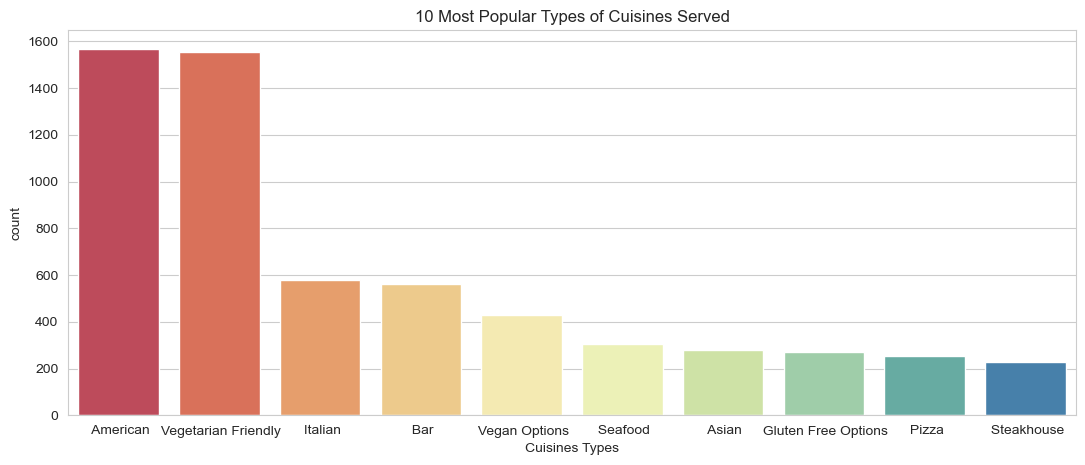

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
sns.set_style("whitegrid")

ax=sns.countplot(x=series,order=series.value_counts().iloc[:10].index,palette="Spectral")
ax.set_title("10 Most Popular Types of Cuisines Served")
ax.set_xlabel("Cuisines Types")

In [23]:
types_seven=df["Type"].value_counts().nlargest(7)

In [24]:
types_seven.index

Index([' American, Vegetarian Friendly, Vegan Options',
       ' Italian, Vegetarian Friendly, Vegan Options', ' American, Bar, Pub',
       ' Italian, Pizza, Vegetarian Friendly',
       ' American, Bar, Vegetarian Friendly',
       ' American, Diner, Vegetarian Friendly', ' Japanese, Sushi, Asian'],
      dtype='object')

In [25]:
types_seven.values

array([148, 137, 133, 127, 112,  63,  61], dtype=int64)

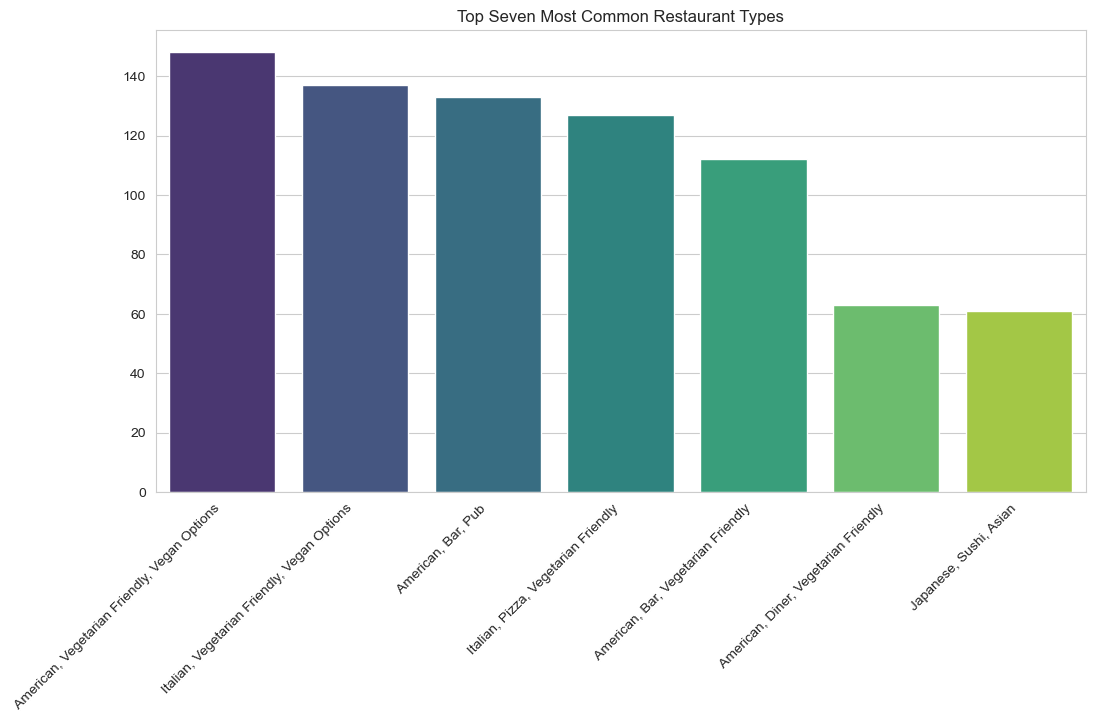

In [26]:
types_seven=df["Type"].value_counts().nlargest(7)

plt.figure(figsize=(12,6))

sns.barplot(x=types_seven.index,
           y=types_seven.values,
           palette="viridis")


plt.title("Top Seven Most Common Restaurant Types")
plt.xticks(rotation=45,ha="right")
plt.show()

### <font color="blue"> City State Zipcode

In [27]:
#df[["City","State","ZipCode"]]=df["Location"].str.extract(r"^(.+),\s(.+)\s(.+)$")

In [28]:
df[['City', 'State ZipCode']] = df['Location'].str.split(',', n=1, expand=True)


In [29]:
df.isnull().sum()

Name                0
Street Address      0
Location            0
Type                0
Reviews             0
No of Reviews       0
Comments          615
City                0
State ZipCode       0
dtype: int64

In [30]:
df.head(1)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,City,State ZipCode
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,San Francisco,CA 94133-3908


In [31]:
df['State ZipCode']=df['State ZipCode'].str.strip()

In [32]:
df[['State', 'ZipCode']] = df['State ZipCode'].str.split(' ',n=1, expand=True)

In [33]:
df.head(1)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,City,State ZipCode,State,ZipCode
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,San Francisco,CA 94133-3908,CA,94133-3908


In [34]:
df["ZipCode"]

0       94133-3908
1       07601-6337
2       12601-5476
3       75093-7777
4            13212
           ...    
3055    98087-3201
3056         10013
3057    07728-4801
3058    07607-1336
3059         07311
Name: ZipCode, Length: 3060, dtype: object

In [35]:
df=df.drop(["Location","Street Address","State ZipCode"],axis=1)

In [36]:
df.head(1)

,Name,Type,Reviews,No of Reviews,Comments,City,State,ZipCode
0,Betty Lou's Seafood and Grill,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,San Francisco,CA,94133-3908


In [37]:
df.head()

,Name,Type,Reviews,No of Reviews,Comments,City,State,ZipCode
0,Betty Lou's Seafood and Grill,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,San Francisco,CA,94133-3908
1,Coach House Diner,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",Hackensack,NJ,07601-6337
2,Table Talk Diner,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,Poughkeepsie,NY,12601-5476
3,Sixty Vines,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,Plano,TX,75093-7777
4,The Clam Bar,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,Syracuse,NY,13212


In [38]:
df

,Name,Type,Reviews,No of Reviews,Comments,City,State,ZipCode
0,Betty Lou's Seafood and Grill,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,San Francisco,CA,94133-3908
1,Coach House Diner,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",Hackensack,NJ,07601-6337
2,Table Talk Diner,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,Poughkeepsie,NY,12601-5476
3,Sixty Vines,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,Plano,TX,75093-7777
4,The Clam Bar,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,Syracuse,NY,13212
...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,"American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,Lynnwood,WA,98087-3201
3056,City Vineyard,"American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",New York City,NY,10013
3057,BRIO Tuscan Grille,"Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,Freehold,NJ,07728-4801
3058,Maywood Pancake house,"American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,Maywood,NJ,07607-1336


In [39]:
df.isnull().sum()

Name               0
Type               0
Reviews            0
No of Reviews      0
Comments         615
City               0
State              0
ZipCode           25
dtype: int64

Text(0.5, 1.0, 'City')

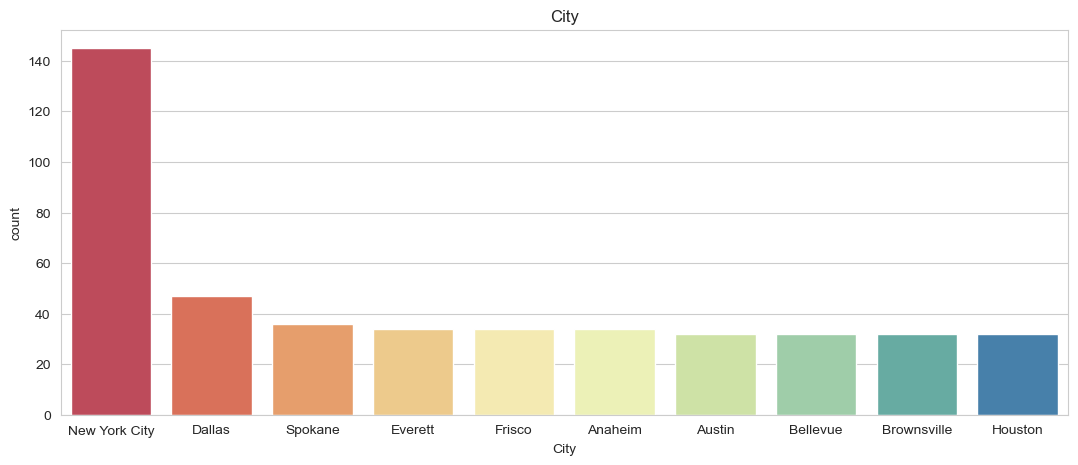

In [40]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
sns.set_style("whitegrid")

ax=sns.countplot(x=df["City"],order=df["City"].value_counts().iloc[:10].index,palette="Spectral")
ax.set_title("City")


Text(0.5, 1.0, 'State')

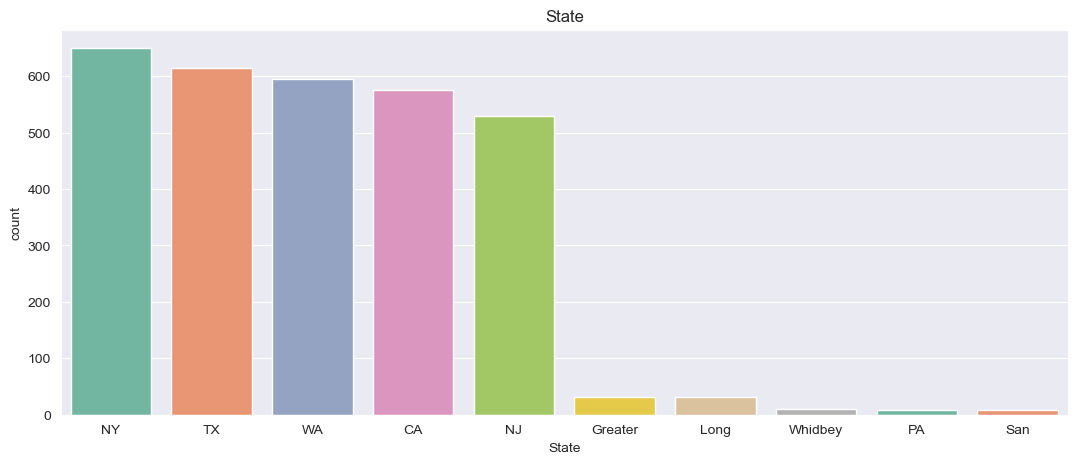

In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
sns.set_style("darkgrid")

ax=sns.countplot(x=df["State"],order=df["State"].value_counts().iloc[:10].index,palette="Set2")
ax.set_title("State")


### <font color="blue"> Finding Most Highly Rated Restaurants

In [42]:
df["Reviews"]=df["Reviews"].str.split(" of ").apply(lambda x:float(x[0]))

In [43]:
df["No of Reviews"]=df["No of Reviews"].str.replace(" reviews","").str.replace(",","")

In [44]:
df["No of Reviews"].dtype 

dtype('O')

In [45]:
df["No of Reviews"]=df["No of Reviews"].str.replace(" review","")

In [46]:
df["No of Reviews"]=df["No of Reviews"].astype("int64") # 1 review

In [47]:
df["No of Reviews"].dtype 

dtype('int64')

**df["weighted_raitngs"]=df["Reviews"]*df["No of Reviews"]**

* This code creates a new column called "weighted_raitngs" and places in this scores the weighted scores obtained by multiplying the values in the "Reviews" column by their equivalent in the "No of Reviews" column

* That is multiplying a score in the "Reviews" column by its equivalent in the "No of Reviews" column will gain a higher weight given how many people wrote that review. This is a method often used on online rating platforms where reviews are made using a spesific rating scale

In [48]:
df["weighted_raitngs"]=df["Reviews"]*df["No of Reviews"]

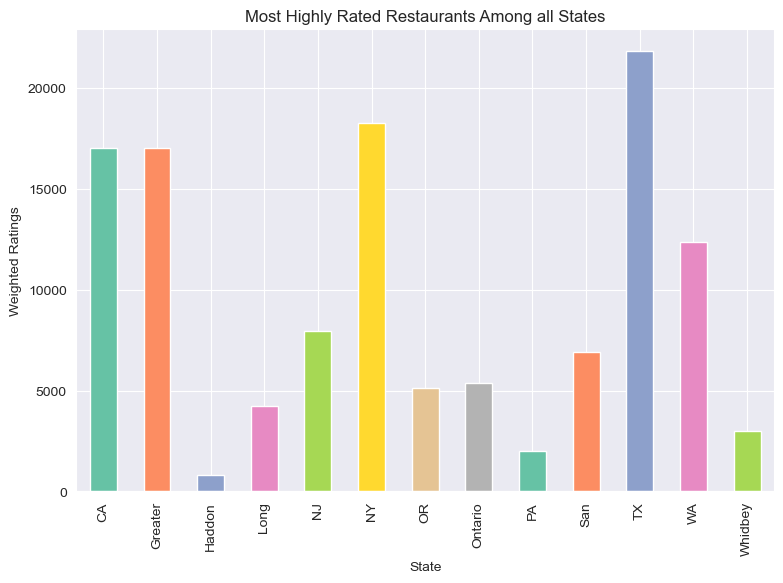

In [49]:
df.groupby("State").weighted_raitngs.max().plot(kind="bar",
                                                figsize=(9,6),
                                                color=sns.color_palette("Set2"))

plt.title("Most Highly Rated Restaurants Among all States")
plt.xlabel("State")
plt.ylabel("Weighted Ratings")
plt.show()

## <font color="purple"> Recommendation

**Targets:** 

* Star ratings
* Total number of people who rated
* Customer reviews (Comments)

In [50]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
df.isnull().sum()

Name                  0
Type                  0
Reviews               0
No of Reviews         0
Comments            615
City                  0
State                 0
ZipCode              25
weighted_raitngs      0
dtype: int64

In [52]:
df[df["ZipCode"].isnull()]

,Name,Type,Reviews,No of Reviews,Comments,City,State,ZipCode,weighted_raitngs
49,Luby's Cafeteria Mall Del Norte,"American, Vegetarian Friendly, Vegan Options",4.0,27,"Located inside the Mall Del Norte, this is a r...",Laredo,TX,None,108.0
356,Crafthouse Gastropub,"American, Bar, Pub",4.0,137,"Super inventive ingredients, many even stumped...",Lubbock,TX,None,548.0
601,Genesee Brew House,"American, Bar, Pub",4.5,807,In fact the menu is pretty broad. I saw severa...,Rochester,NY,None,3631.5
640,Vic's,"Pizza, Vegetarian Friendly, Vegan Options",4.5,62,Don't turn up to this place for a fresh pizza ...,Olympia,WA,None,279.0
671,It's Greek to Me,"Mediterranean, Greek, Vegetarian Friendly",4.0,53,"Great food, menu. My friend's family is from G...",Clifton,NJ,None,212.0
711,Rodeo Goat,"American, Bar, Vegetarian Friendly",4.5,694,The Rodeo Goat has a large patio. The burgers...,Fort Worth,TX,None,3123.0
805,Coqueta,"Mediterranean, Spanish, Catalan",4.5,718,NaN,San Francisco,CA,None,3231.0
837,JP's Taproom & Grill,"American, Bar, Pub",4.0,32,My fiance and often hit JP's after work. They ...,Kent,WA,None,128.0
884,Bogie's Hoagies,"American, Vegetarian Friendly",4.5,66,If you’re tired of the hero sandwiches prepare...,Hawthorne,NJ,None,297.0
1315,Blazing Onion Burger Company,"American, Bar",4.0,139,A pleasant restaurant with ample seating and a...,Lynnwood,WA,None,556.0


In [53]:
del df["ZipCode"]

In [54]:
df.sample()

,Name,Type,Reviews,No of Reviews,Comments,City,State,weighted_raitngs
2183,Osawa Pasadena,"Japanese, Sushi, Asian",4.5,77,NaN,Pasadena,CA,346.5


### <font color="blue">Weighted Ratings Based

In [55]:
grouped=df.groupby("Name").agg({"weighted_raitngs":[np.size,np.mean]})
grouped

weighted_raitngs        
                                      size    mean
Name                                              
135 Prime                                1   900.0
144 Restaurant and Lounge                1   964.0
15 Church Restaurant                     2  3694.5
18 Oaks                                  1  1575.0
1848 BBQ                                 1    58.5
...                                    ...     ...
rise n°1                                 1  5053.5
rise n°3                                 1  1155.0
sahara restaurant                        1   740.0
vintage Cafe                             1   400.0
zero otto nove                           2  1917.0

[2640 rows x 2 columns]

In [56]:
popular = grouped.sort_values(("weighted_raitngs","mean"),ascending=False)

In [57]:
popular

weighted_raitngs         
                                         size     mean
Name                                                  
Big Texan Steak Ranch                       1  21792.0
Boudro's                                    1  20790.0
The River Cafe                              1  18247.5
Club A Steakhouse                           2  17901.0
Taste of Texas Restaurant                   1  17131.5
...                                       ...      ...
Domingo's Italian Deli                      1     36.0
Henry's Ocean View Dining                   1     35.0
Currant Bistro                              1     28.0
Ammatoli Mediterranean Bites                1     20.0
Very Juice                                  1      5.0

[2640 rows x 2 columns]

### <font color="blue"> Type Based

In [58]:
feature = df["Type"].tolist()

tfidf = text.TfidfVectorizer(input=feature,stop_words="english")

In [59]:
tfidf

TfidfVectorizer(input=[' Seafood, Vegetarian Friendly, Vegan Options',
                       ' Diner, American, Vegetarian Friendly',
                       ' American, Diner, Vegetarian Friendly',
                       ' American, Wine Bar, Vegetarian Friendly',
                       ' American, Bar, Seafood', ' Seafood, Italian, Pizza',
                       ' American, Steakhouse, Bar',
                       ' Mediterranean, Greek, Healthy',
                       ' Italian, Pizza, Vegetarian Friendly',
                       ' American, Steakhouse, Gluten Free Option...
                       ' Steakhouse, Mexican, Vegetarian Friendly',
                       ' American, Vegetarian Friendly, Vegan Options',
                       ' Bar, Contemporary, Fusion',
                       ' American, Bar, Gluten Free Options',
                       ' American, European, Vegetarian Friendly',
                       ' Italian, Vegetarian Friendly, Gluten Free Options',
               

In [60]:
tfidf_matrix = tfidf.fit_transform(feature)

In [61]:
tfidf_matrix

<3060x112 sparse matrix of type '<class 'numpy.float64'>'
	with 11358 stored elements in Compressed Sparse Row format>

In [62]:
similarity=cosine_similarity(tfidf_matrix)

In [63]:
similarity

array([[1.        , 0.19583442, 0.19583442, ..., 0.        , 0.48835401,
        0.69748992],
       [0.19583442, 1.        , 1.        , ..., 0.        , 0.0693731 ,
        0.20880285],
       [0.19583442, 1.        , 1.        , ..., 0.        , 0.0693731 ,
        0.20880285],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.26009989],
       [0.48835401, 0.0693731 , 0.0693731 , ..., 0.        , 1.        ,
        0.52069351],
       [0.69748992, 0.20880285, 0.20880285, ..., 0.26009989, 0.52069351,
        1.        ]])

In [64]:
indices = pd.Series(df.index,index=df["Name"])

In [65]:
indices

Name
Betty Lou's Seafood and Grill       0
Coach House Diner                   1
Table Talk Diner                    2
Sixty Vines                         3
The Clam Bar                        4
                                 ... 
Indigo Kitchen & Ale House       3055
City Vineyard                    3056
BRIO Tuscan Grille               3057
Maywood Pancake house            3058
Porto Leggero                    3059
Length: 3060, dtype: int64

In [66]:
def recom(name,similarity=similarity):
    index=indices[name]
    
    similarity_scores=list(enumerate(similarity[index]))
    
    #acquired guest ratings are sorted from high to low
    similarity_scores=sorted(similarity_scores, key=lambda x: x[1],reverse=True)
    
    similarity_scores=similarity_scores[0:10]
    restaurant_indices=[i[0] for i in similarity_scores]
    return df["Name"].iloc[restaurant_indices]

In [67]:
recom("Big Texan Steak Ranch")

81                            H3 Ranch
2164             Big Texan Steak Ranch
2853          The Ranch at Las Colinas
2223       Jakes Original Tex Mex Cafe
2330         Green Chile Willy's Grill
51        Lonesome Dove Western Bistro
883                           Boudro's
110                LongHorn Steakhouse
165                    Texas Roadhouse
170     Golden Steer Steak'n Rib House
Name: Name, dtype: object

### <font color="blue"> Comment Based

In [68]:
df.isnull().sum()

Name                  0
Type                  0
Reviews               0
No of Reviews         0
Comments            615
City                  0
State                 0
weighted_raitngs      0
dtype: int64

In [69]:
df["Comments"]=df["Comments"].fillna("Unknown")

In [70]:
feature = df["Comments"].tolist()

tfidf = text.TfidfVectorizer(input=feature,stop_words="english")

tfidf_matrix = tfidf.fit_transform(feature)

similarity=cosine_similarity(tfidf_matrix)

indices = pd.Series(df.index,index=df["Name"])

def recom(name,similarity=similarity):
    index=indices[name]
    
    similarity_scores=list(enumerate(similarity[index]))
    
    #acquired guest ratings are sorted from high to low
    similariry_scores=sorted(similarity_scores, key=lambda x: x[1],reverse=True)
    
    similarity_scores=similarity_scores[0:10]
    restaurant_indices=[i[0] for i in similarity_scores]
    return df.iloc[restaurant_indices]

In [71]:
recom("Big Texan Steak Ranch")

,Name,Type,Reviews,No of Reviews,Comments,City,State,weighted_raitngs
0,Betty Lou's Seafood and Grill,"Seafood, Vegetarian Friendly, Vegan Options",4.5,243,Unknown,San Francisco,CA,1093.5
1,Coach House Diner,"Diner, American, Vegetarian Friendly",4.0,84,"Both times we were there very late, after 11 P...",Hackensack,NJ,336.0
2,Table Talk Diner,"American, Diner, Vegetarian Friendly",4.0,256,Waitress was very friendly but a little pricey...,Poughkeepsie,NY,1024.0
3,Sixty Vines,"American, Wine Bar, Vegetarian Friendly",4.5,235,Not sure why I went there for the second time....,Plano,TX,1057.5
4,The Clam Bar,"American, Bar, Seafood",4.0,285,Doesn't look like much from the outside but wa...,Syracuse,NY,1140.0
5,E Tutto Qua,"Seafood, Italian, Pizza",4.5,1406,Unknown,San Francisco,CA,6327.0
6,Black Angus Steakhouse - Federal Way,"American, Steakhouse, Bar",4.0,220,This is an easy any time place to have dinner!...,Federal Way,WA,880.0
7,Ziziki's,"Mediterranean, Greek, Healthy",4.5,89,My husband and I went to Greece last fall and ...,Dallas,TX,400.5
8,Vince's Italian Restaurant & Pizzeria,"Italian, Pizza, Vegetarian Friendly",4.0,90,I love Vince's pizza and I was in the neighbor...,Renton,WA,360.0
9,John Thomas Steakhouse,"American, Steakhouse, Gluten Free Options",4.0,258,"The ambience, food and service were all excell...",Ithaca,NY,1032.0


### bonus

In [76]:
def recommend_for_comments(df,name):
    feature = df["City"].tolist()

    tfidf = text.TfidfVectorizer(input=feature,stop_words="english")

    tfidf_matrix = tfidf.fit_transform(feature)

    similarity=cosine_similarity(tfidf_matrix)

    indices = pd.Series(df.index,index=df["Name"])
    
    index=indices[name]
    
    similarity_scores=list(enumerate(similarity[index]))
    
    #acquired guest ratings are sorted from high to low
    similariry_scores=sorted(similarity_scores, key=lambda x: x[1],reverse=True)
    
    similarity_scores=similarity_scores[0:10]
    restaurant_indices=[i[0] for i in similarity_scores]
    
    
    return df.iloc[restaurant_indices]

In [77]:
recommend_for_comments(df,"E Tutto Qua")

,Name,Type,Reviews,No of Reviews,Comments,City,State,weighted_raitngs
0,Betty Lou's Seafood and Grill,"Seafood, Vegetarian Friendly, Vegan Options",4.5,243,Unknown,San Francisco,CA,1093.5
1,Coach House Diner,"Diner, American, Vegetarian Friendly",4.0,84,"Both times we were there very late, after 11 P...",Hackensack,NJ,336.0
2,Table Talk Diner,"American, Diner, Vegetarian Friendly",4.0,256,Waitress was very friendly but a little pricey...,Poughkeepsie,NY,1024.0
3,Sixty Vines,"American, Wine Bar, Vegetarian Friendly",4.5,235,Not sure why I went there for the second time....,Plano,TX,1057.5
4,The Clam Bar,"American, Bar, Seafood",4.0,285,Doesn't look like much from the outside but wa...,Syracuse,NY,1140.0
5,E Tutto Qua,"Seafood, Italian, Pizza",4.5,1406,Unknown,San Francisco,CA,6327.0
6,Black Angus Steakhouse - Federal Way,"American, Steakhouse, Bar",4.0,220,This is an easy any time place to have dinner!...,Federal Way,WA,880.0
7,Ziziki's,"Mediterranean, Greek, Healthy",4.5,89,My husband and I went to Greece last fall and ...,Dallas,TX,400.5
8,Vince's Italian Restaurant & Pizzeria,"Italian, Pizza, Vegetarian Friendly",4.0,90,I love Vince's pizza and I was in the neighbor...,Renton,WA,360.0
9,John Thomas Steakhouse,"American, Steakhouse, Gluten Free Options",4.0,258,"The ambience, food and service were all excell...",Ithaca,NY,1032.0
